In [59]:
import glob
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import seaborn as sns
# sns.set_style("whitegrid")

In [60]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.titlesize'] = 14

In [61]:
logfiles = []
results = []
for file in glob.glob("test_results/*.log"):
    # logfiles.append(file.replace('.log',''))
    with open(file) as f:
        text = f.read()
    text = text.replace("\u202f", "")

    freq = float(file.split("/")[-1].split("_")[0])

    score = float(re.search("Final result: ([\d.]+)", text).group(1))
    joules = float(re.search("([\d,]+) Joules power", text).group(1).replace(",", "."))
    elapsed = float(re.search("([\d,]+) seconds time elapsed", text).group(1).replace(",", "."))

    results.append({"freq": freq, "Joules": joules, "result": score, "time": elapsed})

In [62]:
exp_res = pd.DataFrame(results)
exp_res["score_per_joule"] = exp_res["result"] / exp_res["Joules"]

exp_res_agg = exp_res.groupby("freq").agg({k: ["median", "max", "min", list] for k in exp_res.columns if k != "freq"})
exp_res_agg = exp_res_agg.reset_index()

exp_res_agg.columns = ['_'.join(col).strip("_ ") for col in exp_res_agg.columns.values]


In [63]:
def vs_freq_plot(exp_res_agg, yax):
    plt.errorbar(
        exp_res_agg["freq"],
        exp_res_agg[f"{yax}_median"],
        yerr=np.abs(
            (
                exp_res_agg[[f"{yax}_min", f"{yax}_max"]].values
                - exp_res_agg[[f"{yax}_median"]].values
            ).T
        ),
        fmt="",
        linestyle="",
        color='tab:red',
        alpha=0.8,
        capsize=10,
        capthick=1,
        linewidth=1,
    )

    plt.scatter(exp_res["freq"], exp_res[yax], alpha=0.5, color="gray")
    plt.fill_between(exp_res_agg["freq"], exp_res_agg[f"{yax}_min"], exp_res_agg[f"{yax}_max"], color='tab:red', alpha=0.1, label='Confidence Intervals')

    plt.plot(exp_res_agg["freq"], exp_res_agg[f"{yax}_median"], linestyle="--", color="tab:red")

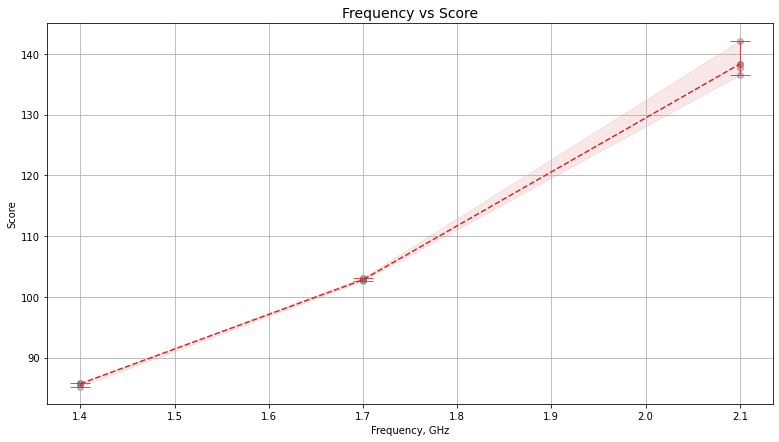

In [64]:
yax = "result"
vs_freq_plot(exp_res_agg, yax)

plt.title("Frequency vs Score")
plt.xlabel("Frequency, GHz")
plt.ylabel("Score")
plt.grid()
plt.savefig("figures/freq-res.pdf", pad_inches=0.2)
plt.show()


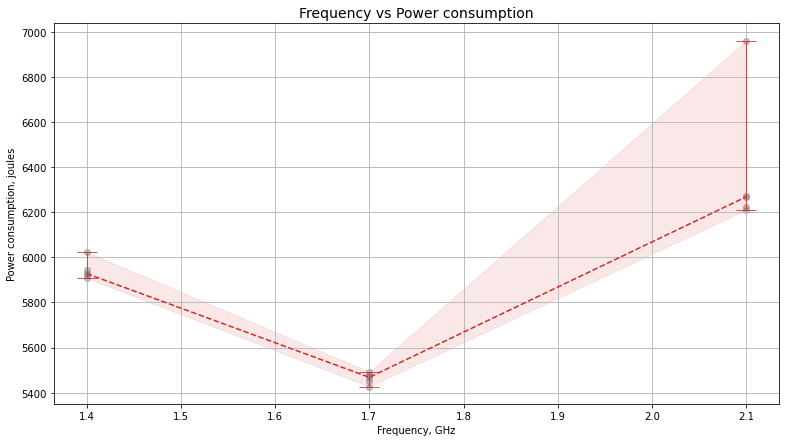

In [65]:
vs_freq_plot(exp_res_agg, "Joules")

plt.title("Frequency vs Power consumption")
plt.xlabel("Frequency, GHz")
plt.ylabel("Power consumption, joules")
plt.grid()
plt.savefig("figures/freq-joul.pdf", pad_inches=0.2)
plt.show()

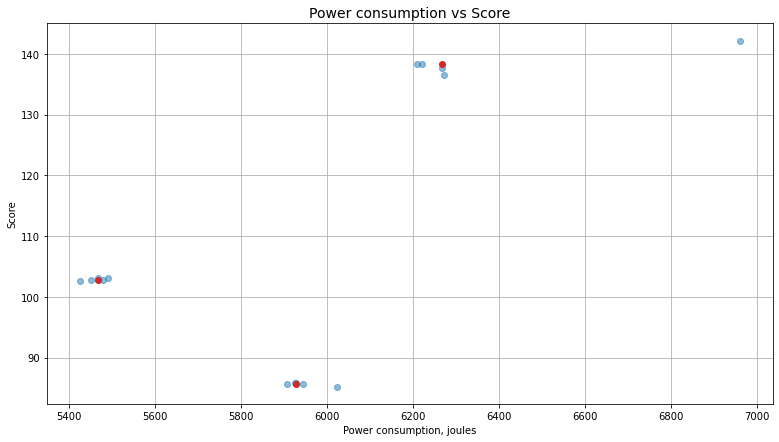

In [66]:
plt.scatter(exp_res['Joules'], exp_res['result'], marker = 'o', alpha=0.5)
plt.scatter(exp_res_agg['Joules_median'], exp_res_agg['result_median'], marker='o', alpha=1, color="tab:red")


plt.title("Power consumption vs Score")
plt.xlabel("Power consumption, joules")
plt.ylabel("Score")
plt.grid()
plt.savefig("figures/joul-score.pdf", pad_inches=0.2)
plt.show()

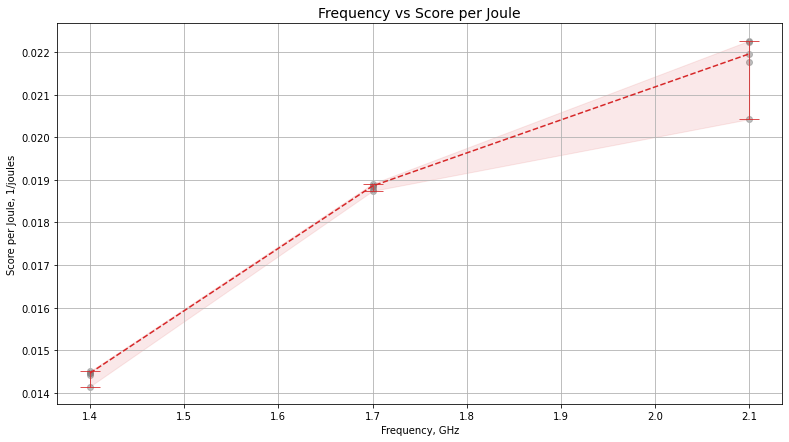

In [67]:
vs_freq_plot(exp_res_agg, "score_per_joule")

plt.title("Frequency vs Score per Joule")
plt.xlabel("Frequency, GHz")
plt.ylabel("Score per Joule, 1/joules")
plt.grid()
plt.savefig("figures/freq-score-per-joul.pdf", pad_inches=0.2)
plt.show()